## Разведочный анализ данных (**EDA**)
---
В этом ноутбуке:
1. Знакомство с данными
2. Перевод всех признаков
3. Просмотр, пропусков, дубликатов и корреляционной матрицы
4. Визуализация основных признаков

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка визуализации
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 6)

# ---- Загрузка данных ----
df = pd.read_csv("../data/raw/imdb_top_1000.csv")
df.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [2]:
# Количество строк и колонок
df.shape

(1000, 16)

In [3]:
# Общая информация по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


## Перевод всех признаков датасета IMDb :

##### 1. Poster_Link - Веб-ссылка (URL)

##### 2. Series_Title - Название фильма

##### 3. Released_Year - Год выпуска

##### 4. Certificate - Сертификат

##### 5. Runtime - Продолжительность

##### 6. Genre - Жанр

##### 7. IMDB_Rating - Рейтинг IMDB

##### 8. Overview - Описание

##### 9. Meta_score - Мета-оценка

##### 10. Director - Режиссер

##### 11-14. Star1, Star2, Star3, Star4 - Имена четырех главных актеров, звезд фильма.

##### 15. No_of_votes - Количество_голосов

##### 16. Gross - Сборы

In [4]:
# Статистика
df.describe(include="all")

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000,1000,899,1000,1000,1000.000000,1000,843.000000,1000,1000,1000,1000,1000,1.000000e+03,831
unique,1000,999,100,16,140,202,NaN,1000,NaN,548,660,841,891,939,NaN,823
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,NaN,Two imprisoned men bond over a number of years...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,1,2,32,234,23,85,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.949300,NaN,77.971530,NaN,NaN,NaN,NaN,NaN,2.736929e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.275491,NaN,12.376099,NaN,NaN,NaN,NaN,NaN,3.273727e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,NaN


In [8]:
# ---- Пропуски ----
print("Количество пропусков:\n", df.isnull().sum())

Количество пропусков:
 Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [9]:
# Дубликаты
print("Дубликаты:", df.duplicated().sum())

Дубликаты: 0


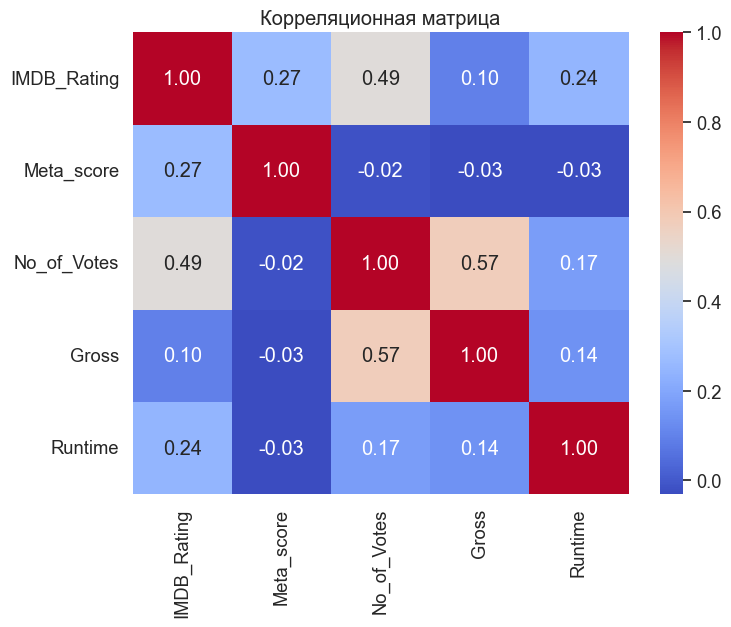

In [80]:
# ---- Корреляционная матрица ----
plt.figure(figsize=(8, 6))
corr = df[['IMDB_Rating','Meta_score','No_of_Votes','Gross','Runtime']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

In [10]:
# ---- Топ-10 фильмов по рейтингу ----
top_movies = df[['Series_Title', 'IMDB_Rating']].sort_values(by='IMDB_Rating', ascending=False).head(10)
print(top_movies)

                                         Series_Title  IMDB_Rating
0                            The Shawshank Redemption          9.3
1                                       The Godfather          9.2
2                                     The Dark Knight          9.0
3                              The Godfather: Part II          9.0
4                                        12 Angry Men          9.0
5       The Lord of the Rings: The Return of the King          8.9
6                                        Pulp Fiction          8.9
7                                    Schindler's List          8.9
10  The Lord of the Rings: The Fellowship of the Ring          8.8
11                                       Forrest Gump          8.8


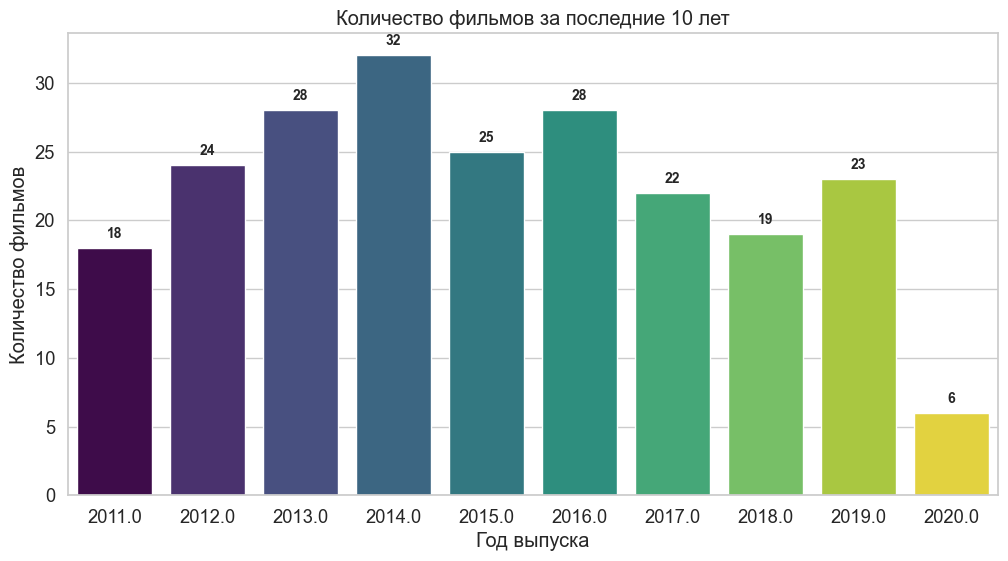

In [21]:
# ---- Преобразуем Released_Year ----
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
# ---- Фильмы за последние 10 лет ----
latest_year = df['Released_Year'].max()
year_counts = df[df['Released_Year'] >= latest_year - 9]['Released_Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=year_counts.index, y=year_counts.values, hue=year_counts.index, palette="viridis", legend=False)
for i, v in enumerate(year_counts.values):
    ax.text(i, v + 0.5, v, ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title("Количество фильмов за последние 10 лет")
plt.xlabel("Год выпуска")
plt.ylabel("Количество фильмов")
plt.show()

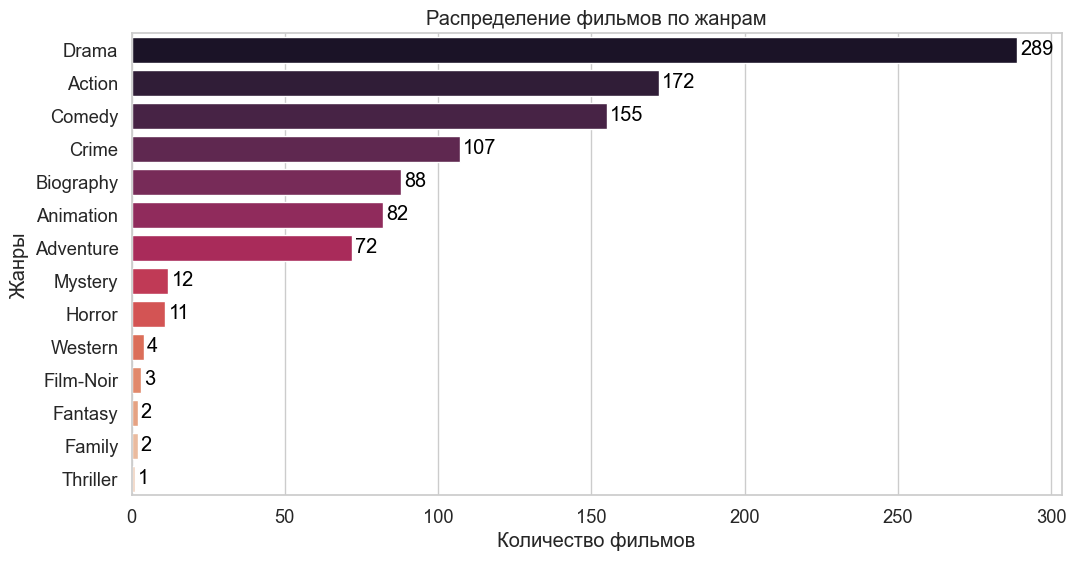

In [23]:
# ---- Жанры ----
df['Main_Genre'] = df['Genre'].str.split(',').str[0]
top_genre = df['Main_Genre'].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_genre.values, y=top_genre.index,hue=top_genre.index, palette="rocket", legend=False)
for i, v in enumerate(top_genre.values):
    ax.text(v + 1, i, str(v), color='black', va='center')
plt.title("Распределение фильмов по жанрам")
plt.xlabel("Количество фильмов")
plt.ylabel("Жанры")
plt.show()

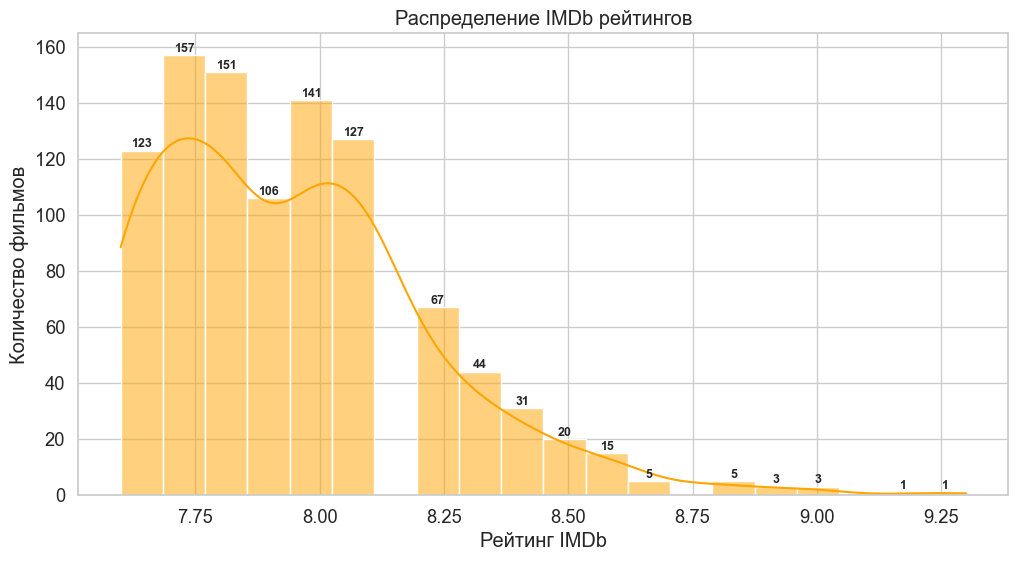

In [63]:
# ---- Распределение IMDb рейтингов ----
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='orange')

for p in ax.patches:
    height = p.get_height()
    if height > 0: 
        ax.text(p.get_x() + p.get_width() / 2, height + 0.2, 
                int(height), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title("Распределение IMDb рейтингов")
plt.xlabel("Рейтинг IMDb")
plt.ylabel("Количество фильмов")
plt.show()

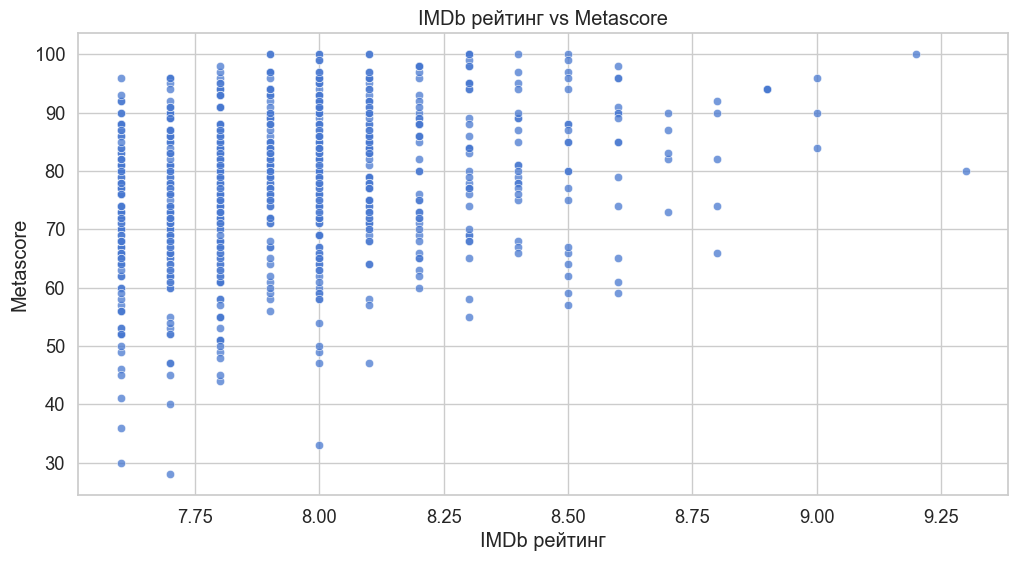

In [42]:
# ---- Сравнение IMDb vs Metascore ----
plt.figure(figsize=(12, 6))
sns.scatterplot(x='IMDB_Rating', y='Meta_score', data=df, alpha=0.75)
plt.title("IMDb рейтинг vs Metascore")
plt.xlabel("IMDb рейтинг")
plt.ylabel("Metascore")
plt.show()

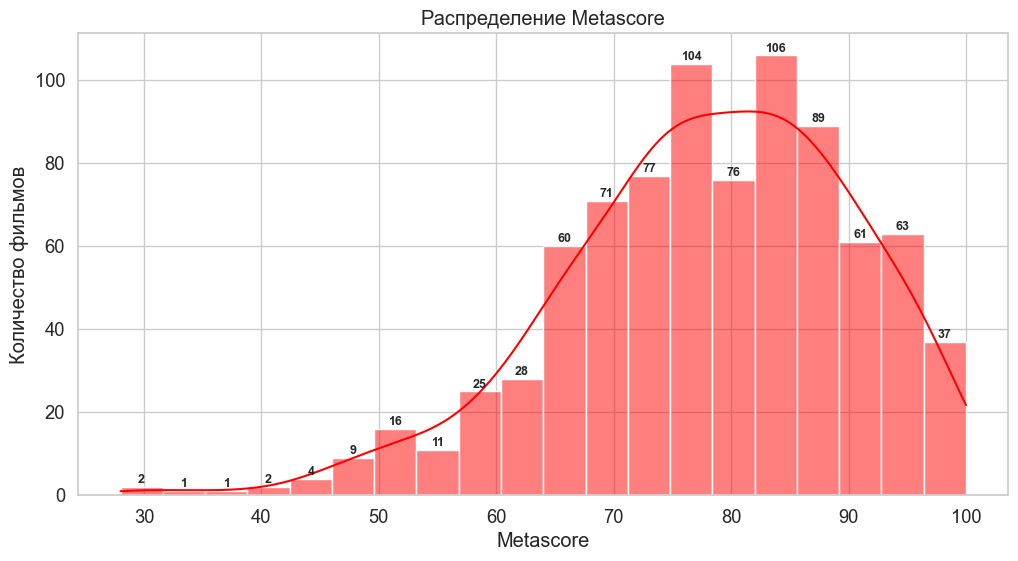

In [70]:
# ---- Распределение Metascore ----
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['Meta_score'].dropna(), bins=20, kde=True, color='red')

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # чтобы не подписывать пустые
        ax.text(p.get_x() + p.get_width() / 2, height + 0.2, 
                int(height), ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.title("Распределение Metascore")
plt.xlabel("Metascore")
plt.ylabel("Количество фильмов")
plt.show()

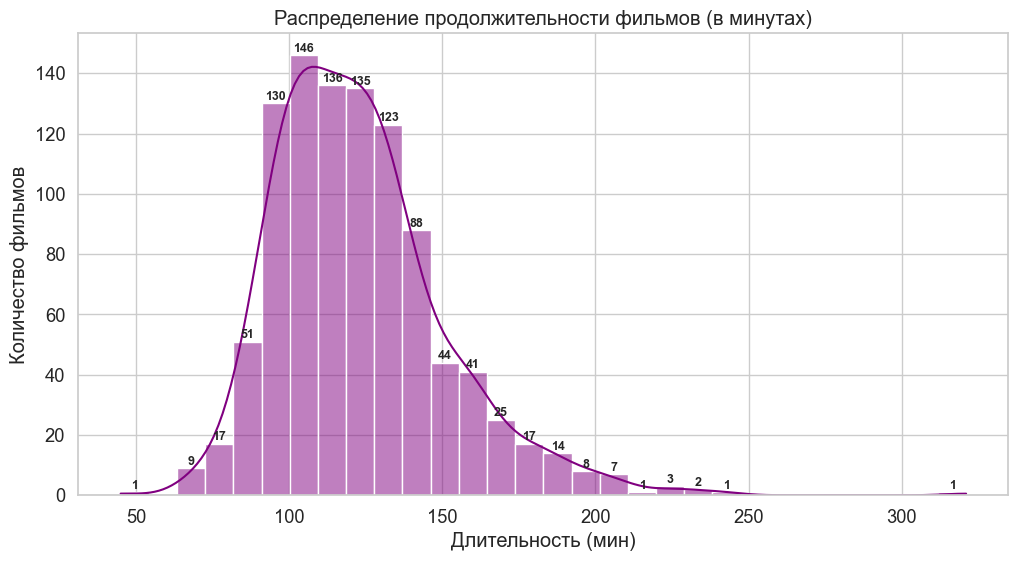

In [72]:
# ---- Длительность фильмов ----
df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '').astype(float)
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['Runtime'], bins=30, kde=True, color='purple')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height + 0.2,
                int(height), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title("Распределение продолжительности фильмов (в минутах)")
plt.xlabel("Длительность (мин)")
plt.ylabel("Количество фильмов")
plt.show()

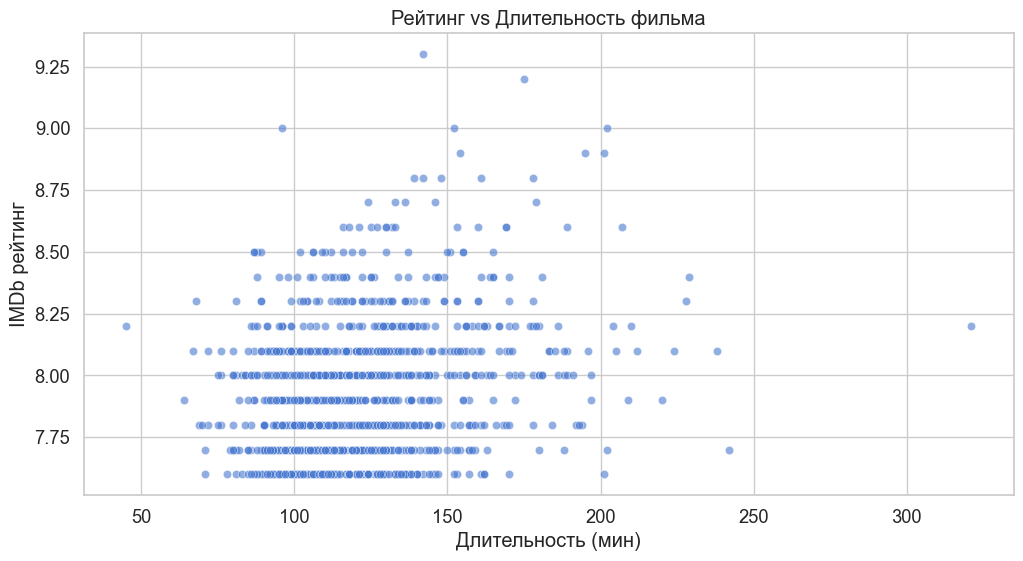

In [50]:
# ---- Рейтинг vs Длительность ----
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Runtime', y='IMDB_Rating', data=df, alpha=0.6)
plt.title("Рейтинг vs Длительность фильма")
plt.xlabel("Длительность (мин)")
plt.ylabel("IMDb рейтинг")
plt.show()

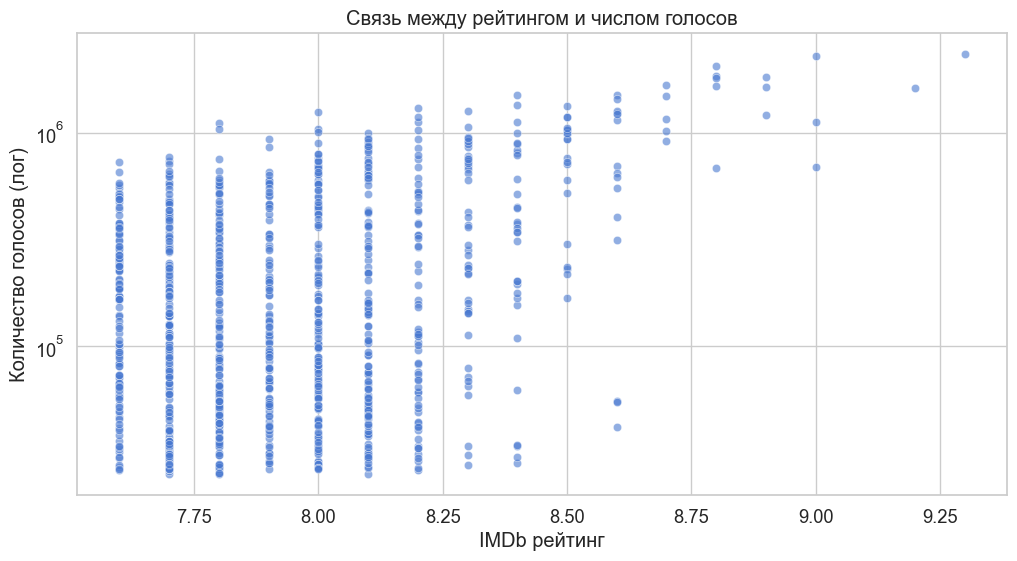

In [49]:
# ---- Популярность (голоса) ----
plt.figure(figsize=(12, 6))
sns.scatterplot(x='IMDB_Rating', y='No_of_Votes', data=df, alpha=0.6)
plt.yscale("log")
plt.title("Связь между рейтингом и числом голосов")
plt.xlabel("IMDb рейтинг")
plt.ylabel("Количество голосов (лог)")
plt.show()

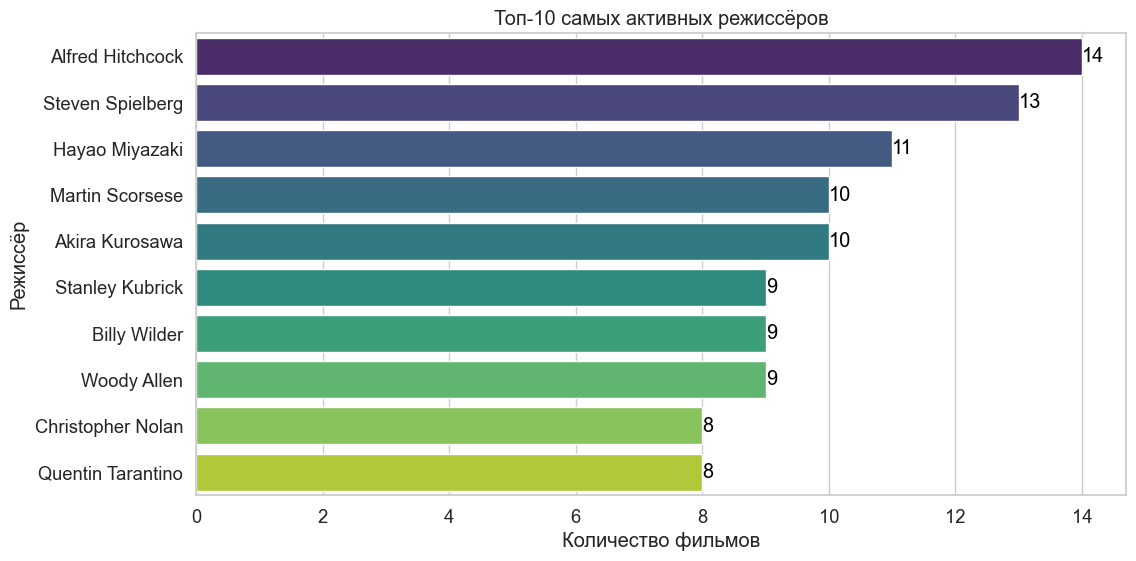

In [75]:
# ---- ТОП режиссёров ----
top_directors = df['Director'].value_counts().head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_directors.values, y=top_directors.index,hue=top_directors.index, palette="viridis", legend=False)
for i, v in enumerate(top_directors.values):
    ax.text(v, i, str(v), color='black', va='center')
plt.title("Топ-10 самых активных режиссёров")
plt.xlabel("Количество фильмов")
plt.ylabel("Режиссёр")
plt.show()

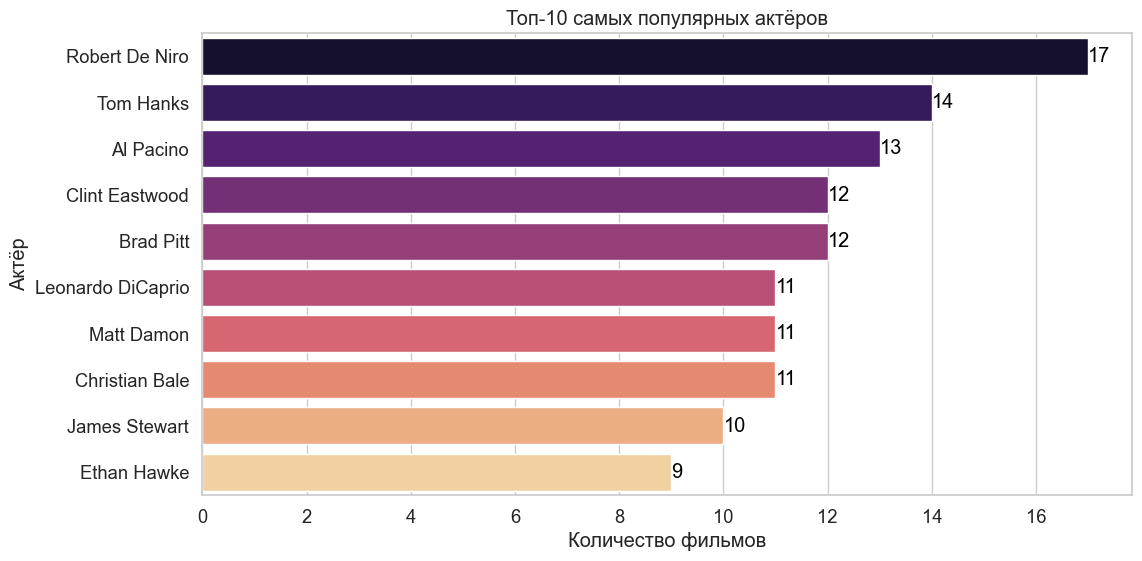

In [77]:
# ---- ТОП актёров ----
actors = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])
top_actors = actors.value_counts().head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_actors.values, y=top_actors.index, hue=top_actors.index, palette="magma", legend=False)
for i, v in enumerate(top_actors.values):
    ax.text(v, i, str(v), color='black', va='center')
plt.title("Топ-10 самых популярных актёров")
plt.xlabel("Количество фильмов")
plt.ylabel("Актёр")
plt.show()

                                   Series_Title        Gross
477  Star Wars: Episode VII - The Force Awakens  936662225.0
59                            Avengers: Endgame  858373000.0
623                                      Avatar  760507625.0
60                       Avengers: Infinity War  678815482.0
652                                     Titanic  659325379.0
357                                The Avengers  623279547.0
891                               Incredibles 2  608581744.0
2                               The Dark Knight  534858444.0
582                                   Rogue One  532177324.0
63                        The Dark Knight Rises  448139099.0


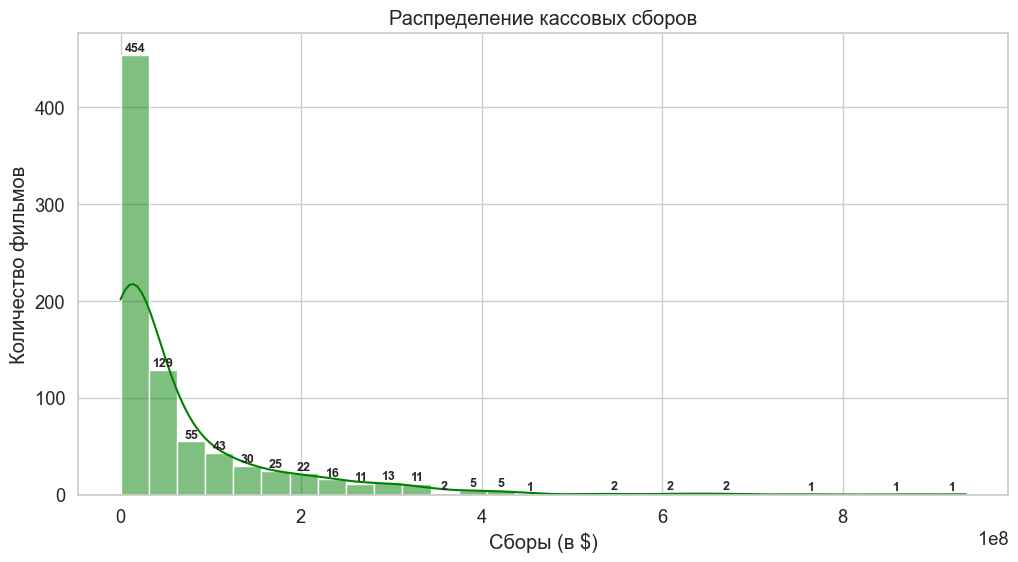

In [78]:
# ---- Кассовые сборы ----
df['Gross'] = df['Gross'].astype(str).str.replace(',', '').replace('nan', None).astype(float)

top_gross = df[['Series_Title','Gross']].dropna().sort_values('Gross', ascending=False).head(10)
print(top_gross)

plt.figure(figsize=(12, 6))
ax = sns.histplot(df['Gross'].dropna(), bins=30, kde=True, color='green')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height + 0.2,
                int(height), ha='center', va='bottom', fontsize=9, fontweight='bold')
        
plt.title("Распределение кассовых сборов")
plt.xlabel("Сборы (в $)")
plt.ylabel("Количество фильмов")
plt.show()

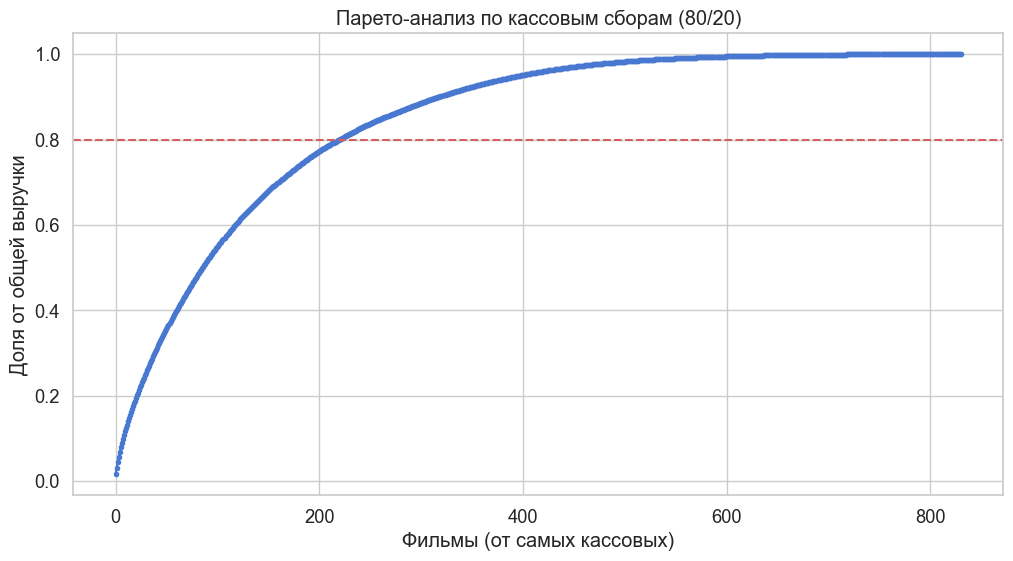

In [57]:
# ---- Парето-анализ по кассовым сборам ----
gross_sorted = df['Gross'].dropna().sort_values(ascending=False)
cum_share = gross_sorted.cumsum() / gross_sorted.sum()

plt.figure(figsize=(12, 6))
plt.plot(range(len(cum_share)), cum_share, marker='.')
plt.axhline(0.8, color='r', linestyle='--')
plt.title("Парето-анализ по кассовым сборам (80/20)")
plt.xlabel("Фильмы (от самых кассовых)")
plt.ylabel("Доля от общей выручки")
plt.show()

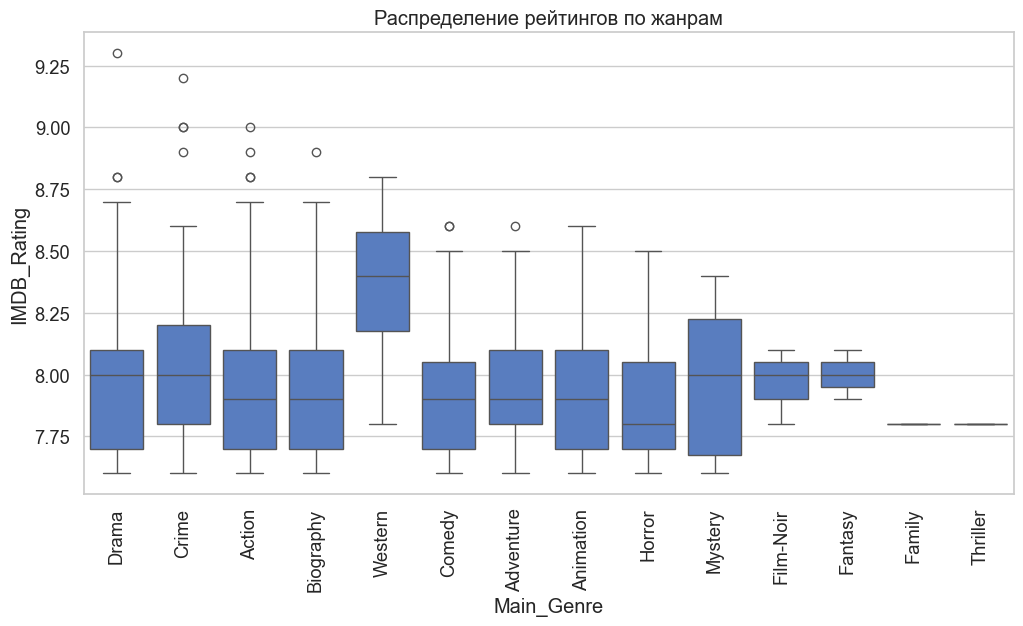

In [79]:
# ---- Рейтинг по жанрам ----
plt.figure(figsize=(12, 6))
sns.boxplot(x='Main_Genre', y='IMDB_Rating', data=df)
plt.xticks(rotation=90)
plt.title("Распределение рейтингов по жанрам")
plt.show()

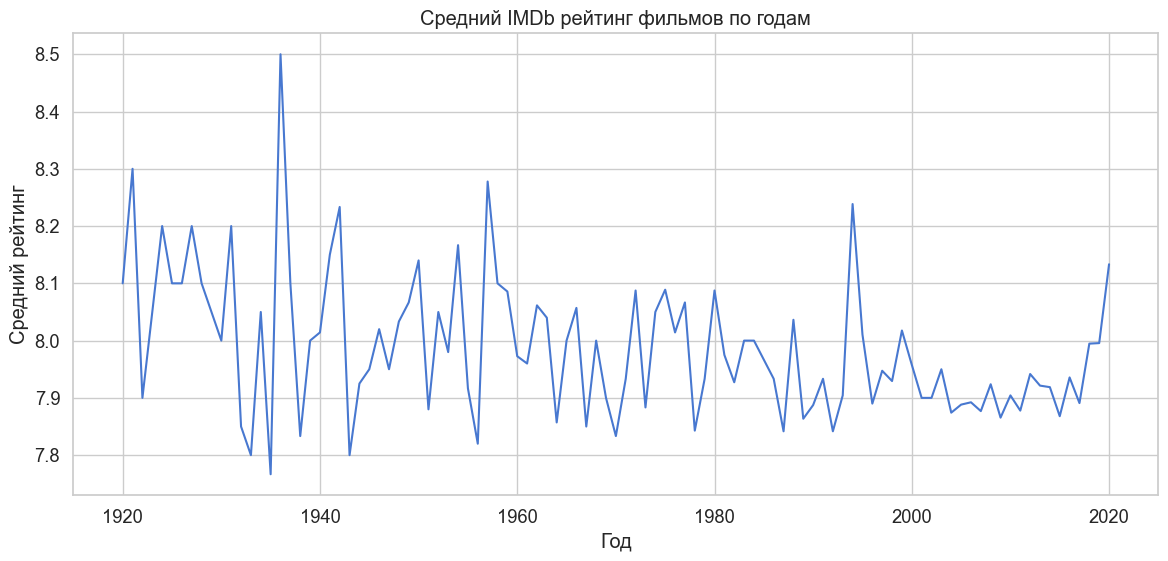

In [55]:
# ---- Средний рейтинг по годам ----
avg_rating_by_year = df.groupby('Released_Year')['IMDB_Rating'].mean().dropna()

plt.figure(figsize=(14,6))
sns.lineplot(x=avg_rating_by_year.index, y=avg_rating_by_year.values)
plt.title("Средний IMDb рейтинг фильмов по годам")
plt.xlabel("Год")
plt.ylabel("Средний рейтинг")
plt.show()